In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

# Read the CSV and Perform Basic Data Cleaning

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
# See the columns
list(df.columns)

['koi_disposition',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

# Select your features (columns)

In [4]:
# Select columns without err
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_period', 
                        'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad',
                       'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg',
                       'koi_srad', 'ra', 'dec', 'koi_kepmag']]

In [5]:
# Set y value
y = df['koi_disposition'].values.reshape(-1, 1)
y

array([['CONFIRMED'],
       ['FALSE POSITIVE'],
       ['FALSE POSITIVE'],
       ...,
       ['CANDIDATE'],
       ['FALSE POSITIVE'],
       ['FALSE POSITIVE']], dtype=object)

In [6]:
# Apply encoding for y
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

/Users/yyh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [7]:
# Apply one-hot encoding for y
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

Using TensorFlow backend.


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, one_hot_y, random_state=42)

In [9]:
# Create a Decision Tree Classifier to identify important features
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [10]:
# Fit the classifier to the data
clf = clf.fit(X_train, y_train)
print("Train Score",clf.score(X_train, y_train))
print("Test Score",clf.score(X_test, y_test))

Train Score 1.0
Test Score 0.8346681922196796


In [11]:
# Create, fit, and score a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
print("RandomForestClassifier Train score", rf.score(X_train, y_train))
print("RandomForestClassifier Test score", rf.score(X_test, y_test))

RandomForestClassifier Train score 1.0
RandomForestClassifier Test score 0.879862700228833


In [12]:
rating = sorted(zip(rf.feature_importances_, selected_features),reverse=True)
rating

[(0.13831437774110317, 'koi_fpflag_co'),
 (0.13349574926174576, 'koi_model_snr'),
 (0.12701428815894902, 'koi_fpflag_nt'),
 (0.10091787627540741, 'koi_fpflag_ss'),
 (0.08176021447836687, 'koi_prad'),
 (0.054497098240840175, 'koi_depth'),
 (0.04780395665903227, 'koi_period'),
 (0.045131931524741334, 'koi_impact'),
 (0.03653412815909355, 'koi_teq'),
 (0.03459732542623043, 'koi_insol'),
 (0.0345891097955501, 'koi_duration'),
 (0.029281536379228014, 'koi_time0bk'),
 (0.025281797443987813, 'koi_steff'),
 (0.02352328277946825, 'ra'),
 (0.022388802399281992, 'koi_kepmag'),
 (0.022240004935328715, 'dec'),
 (0.021819033847159133, 'koi_srad'),
 (0.020809486494485913, 'koi_slogg')]

In [13]:
# Set features. This will also be used as your x values.
final_selected_features = df[['koi_fpflag_co', 'koi_fpflag_nt', 'koi_model_snr', 'koi_fpflag_ss', 'koi_prad']]
# final_selected_features = df[['koi_fpflag_co', 'koi_fpflag_nt', 'koi_model_snr']] --> yielded lower accuracy

# Create a Train Test Split

Use `koi_disposition` for the y values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_selected_features, one_hot_y, random_state=42)

In [15]:
# Display sample from X_train
X_train.head()

,koi_fpflag_co,koi_fpflag_nt,koi_model_snr,koi_fpflag_ss,koi_prad
6122,0,0,10.8,0,1.24
6370,0,0,13.8,1,0.86
2879,0,1,254.3,0,3.21
107,0,0,38.4,0,2.25
29,0,0,696.5,0,12.21


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [16]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit(X_train)

In [17]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



k: 1, Train/Test Score: 0.999/0.826, 1.824
k: 3, Train/Test Score: 0.904/0.844, 1.748
k: 5, Train/Test Score: 0.886/0.850, 1.736
k: 7, Train/Test Score: 0.883/0.852, 1.735
k: 9, Train/Test Score: 0.876/0.857, 1.733
k: 11, Train/Test Score: 0.873/0.867, 1.739
k: 13, Train/Test Score: 0.870/0.856, 1.726
k: 15, Train/Test Score: 0.865/0.858, 1.723
k: 17, Train/Test Score: 0.866/0.858, 1.723
k: 19, Train/Test Score: 0.865/0.858, 1.722


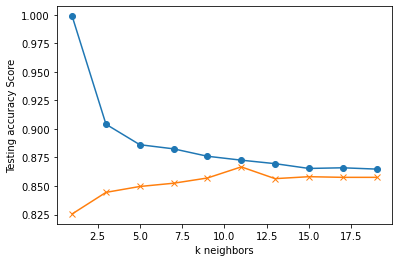

In [18]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
k_number = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    all_score = train_score + test_score
    k_number.append(k)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}, {all_score:.3f}")
    

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [19]:
# Turn results into a dataframe
results = pd.DataFrame({"k": k_number, "train_scores": train_scores, "test_scores": test_scores})

In [20]:
# Choose the best k from above and re-fit the KNN Classifier using that k value.
# print the score for the test data
res2 = results[results["test_scores"]==results["test_scores"].max()]
res3 = res2[res2["train_scores"]==res2["train_scores"].max()]
res3

,k,train_scores,test_scores
5,11,0.872592,0.866705


In [21]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.8647720770551212
Testing Data Score: 0.8575514874141876


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [22]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 50, 2))

param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10)

In [23]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49]})

In [24]:
# List the best parameters for this dataset
# List the best score
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 43}
0.861525627044711


In [25]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [26]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CANDIDATE       0.81      0.64      0.72       411
     CONFIRMED       0.75      0.87      0.80       484
FALSE POSITIVE       0.98      0.97      0.97       853

     micro avg       0.87      0.87      0.87      1748
     macro avg       0.84      0.83      0.83      1748
  weighted avg       0.87      0.87      0.87      1748
   samples avg       0.87      0.87      0.87      1748



/Users/yyh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
# import joblib
# filename = 'your_name.sav'
# joblib.dump(your_model, filename)